# Predicting the sale price of Bulldozers🚜 using Machine Learning 

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem Definition

> How well can we predict the future sell price of a bulldozer, given its characteristics and previous examples of how much previous bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

The data for this competition is split into 3 datasets/parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of
the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your      score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE ( root mean squared log error ) between the actual and predicted auction prices .

**Note:** The goal for most regression evaluation metrics is to minimize the error . For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features 

Kaggle provides a data dictionary detailing all of the features of the dataset. It can be viewed in Excel in the PC or in Google sheets while on the internet.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Import training and validation sets
# We're giving low_memory=False ,otherwise it generates a warning
# This tells that we don't want pandas to minimize the space for our data (as we've got plenty of RAM space)

df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
#Checking out how many null values are in the dataframe 
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [13]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [19]:
df.saledate.dtype

dtype('O')

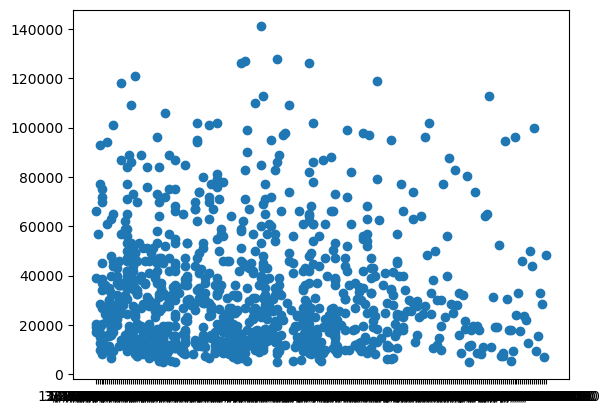

In [14]:
#Plotting to see the scatter of the data
fig,ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

<Axes: ylabel='Frequency'>

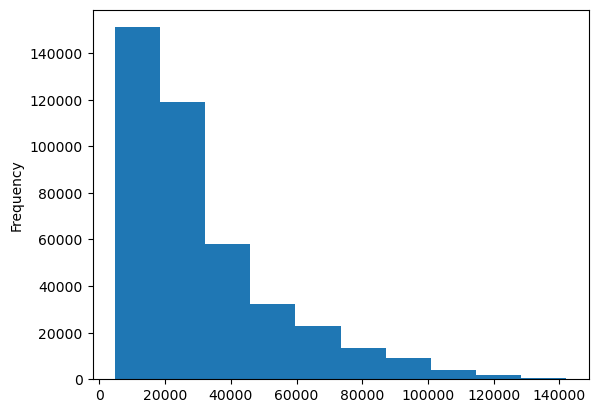

In [11]:
df.SalePrice.plot.hist()

### Parsing dates

When we work with time series data, we want to enrich the time and date component as much as possible.

We can do that by telling pandas which of our columns has dates in them using the 'parse-dates' parameter.

In [11]:
# Import data again but this time parse dates 
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])

In [23]:
#Check how the dtype is different from the previous time
df.saledate.dtype

dtype('<M8[ns]')

In [25]:
df.saledate[:500]
#Note that , '<M8[ns]' is equal to 'datetime64[ns]'

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
495   2007-10-04
496   2009-08-13
497   2010-08-05
498   2011-06-02
499   2011-05-19
Name: saledate, Length: 500, dtype: datetime64[ns]

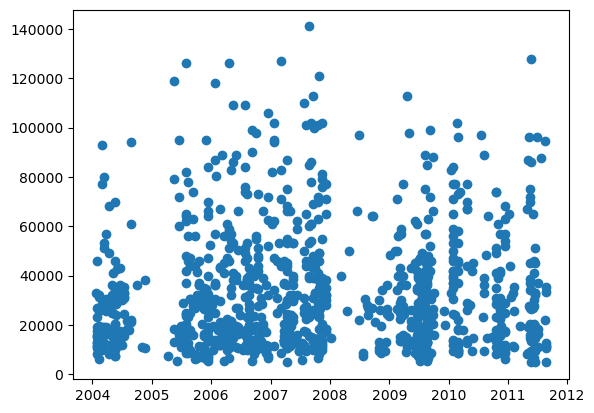

In [27]:
#We're plotting the same scatterplot that we did earlier 
#Notice the difference between this and the previous plot
#The x-axis was overcrowded in the previous one , here it is efficiently segregated
#This was the purpose of parsing the dates 

fig,ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [28]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#Notice how pandas express the columns after "saledate" and before "Undercarraige_pad_width" with '...'
#Now , if we want to view all the columns we could display the transpose of the columns.
#This helps us to view all the columns without any of it being truncated.

df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [33]:
df.saledate.head(20)
#We can see from the output of the above code that our data(years) is not ordered

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort Dataframe by saledate

When working with time series data it's a good idea to sort it by date.

In [12]:
# Sort Dataframe in date order 
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make copy of the original dataframe 

We make a copy of the original dataframe so when we manipulate the copy , we've still got our original data.

In [13]:
#Make a copy 
df_tmp = df.copy()

In [37]:
#Checking if the dataframe is proper or not 
df_tmp.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

### Add datetime parameters for saledate column

In [14]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] =df_tmp.saledate.dt.dayofyear

In [40]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [15]:
# Now we've enriched our dataframe with datetime features ,so we can remove the saledate column
df_tmp.drop("saledate",axis=1, inplace=True)

In [9]:
# Check the values of different columns
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5. Modelling 

We've done enough EDA (we could always do more) but let's start to do some model-driven EDA.

In [10]:
#Let's build a machine learning model 
from sklearn.ensemble import RandomForestRegressor 

model = RandomForestRegressor(n_jobs = -1, #This means using all the processors as we've a large chunk of data to process 
                             random_state=69) #This has the same work as setting a random seed 
model.fit(df_tmp.drop("SalePrice",axis=1) ,df_tmp["SalePrice"])

ValueError: could not convert string to float: 'Low'

* The above code is run and it gives error . This is because our dataframe has many missing values , and all the data are not numeric.
* Hence , we have to make certain adjustments in our data like providing for the missing values & converting obj to no.s
* The following codes/processes depict the execution of the above steps

In [11]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas categories.

We can check the different data types compatible with pandas : https://pandas.pydata.org/pandas-docs/version/1.4/reference/general_utility_functions.html

In [15]:
pd.api.types.is_object_dtype(df_tmp["Blade_Type"])

True

In [16]:
#Find the columns which contain strings 
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [19]:
# Tf you're wondering what df.items() does , here's an example
# This is a typical example of a dictionary , showing it's usage
random_dict = {"key1":"Eren",
               "key2":"Yeager"}
for key,value in random_dict.items():
    print(f"This a key: {key}",
          f"This is a value: {value}")    

This a key: key1 This is a value: Eren
This a key: key2 This is a value: Yeager


In [16]:
# This will turn all of the string(object) values into category values
# Turning this to category helps the string/object to get converted to a numeric code or value.
# This is done because pandas can't work on str or obj values directly , so even though it displays this values under the columns as numbers ,
# it gives them a numeric code under the hood , to perform operations easily
# the 'as_ordered' part further orders the column values in a serial manner , for ex. in an alphabetical way

for label,content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [23]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [25]:
df_tmp.state.cat.codes

0          0
1         32
2         31
3         43
4         31
          ..
412693    43
412694     8
412695     8
412696    43
412697     8
Length: 412698, dtype: int8

* Thanks to pandas Categories , we now have a way to access all our data in the form of numbers.
* But we still have a bunch of missing data...

In [27]:
# Check missing Data
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocessed data 

In [29]:
# Export current tmp dataframe
df_tmp.to_csv("data/bluebook-for-bulldozers/train_tmp.csv",
              index=False)

In [30]:
# Import preprocessed data
df_tmp = pd.read_csv("data/bluebook-for-bulldozers/train_tmp.csv",
                     low_memory=False)
df_tmp.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
fiModelDesc,521D,950FII,226,PC120-6E,S175


## Fill missing values

### Fill numeric missing values first 

In [32]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [36]:
# Check for which numeric columns have null values 
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum(): # Check whether there are any numeric values in the columns or not 
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [17]:
# Fill numeric rows with median
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not 
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [39]:
# Demonstrate how median is more robust than mean , and hence we took median earlier in our data to fill missing values
hundreds = np.full((1000,),100)    # This array shows that there are 1000 people each with 100 dollars
hundreds_billion = np.append(hundreds, 1000000000)     # Then suddenly Bill Gates walks in with a billion dollars $$ 
# Now ,we will check the mean and median of the arrays with these information
np.mean(hundreds),np.mean(hundreds_billion),np.median(hundreds),np.median(hundreds_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

In [41]:
# Check to see how many examples were missing
# The True value depicts how many missing values we filled using the median 
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

### Filling and turning categorical variables into numbers 

In [43]:
# Chcek for columns which aren't numeric
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print (label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [18]:
# Turn categorical variables into numbers and fill something 
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value or not
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers an add +1
        df_tmp[label] = pd.Categorical(content).codes+1 # Pandas shows -1 for missing values , we want it to show 0 , thus adding 1

In [45]:
pd.Categorical(df_tmp["state"]).codes

array([ 0, 32, 31, ...,  8, 43,  8], dtype=int8)

In [48]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [49]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,True
Blade_Type_is_missing,True,True,True,True,True
Travel_Controls_is_missing,True,True,True,True,True
Differential_Type_is_missing,False,False,True,True,True


Now that all of our data is numeric amd our dataframe has no missing values, we should be able to build a machine learning model.

In [11]:
%%time
from sklearn.ensemble import RandomForestRegressor
# Measuring how much time it takes to fit the model
# Instantiate model 
model = RandomForestRegressor(n_jobs = -1,
                             random_state = 69)
# Fit the model
model.fit(df_tmp.drop("SalePrice", axis = 1), df_tmp["SalePrice"])

CPU times: total: 37min 44s
Wall time: 2min 41s


RandomForestRegressor(n_jobs=-1, random_state=69)

In [54]:
# Score the model
model.score(df_tmp.drop("SalePrice",axis=1), df_tmp["SalePrice"])

0.987552961503794

**Question:** Why doesn't the above metric hold water ? (why isn't the metric relaible)

### Splitting the data into train and validation sets

In [10]:
#Checking how many samples are there in each year
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [19]:
# Split the data into training and validation
# We're taking every sample in 2012 as a validation set
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val) , len(df_train)

(11573, 401125)

In [20]:
# Split the dat into X and y
X_train,y_train = df_train.drop("SalePrice",axis = 1), df_train["SalePrice"]
X_valid,y_valid = df_val.drop("SalePrice",axis = 1), df_val["SalePrice"]

X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function

In [21]:
# Create evaluation function(the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    """
    Calculates Root Mean Squared Log Error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# Create a function to evaluate the model on different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train,train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train,train_preds),
              "Valid RMSLE": rmsle(y_valid,val_preds),
              "Training R^2": r2_score(y_train,train_preds),
              "Valid R^2": r2_score(y_valid,val_preds)}
    return scores

## Testing our model on a subset (to tune the hyperparameters)

In [ ]:
# %%time
# This takes far too long...for experimenting
# model = RandomForestRegressor(n_jobs=-1,
                              random_state=69)
# model.fit(X_train,y_train)

In [17]:
from sklearn.ensemble import RandomForestRegressor
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=69,
                              max_samples=10000)

In [20]:
%%time
# Cutting down on the max number of samples each estimator can see improvement in training time.
model.fit(X_train,y_train)

CPU times: total: 1min 10s
Wall time: 5.16 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=69)

In [23]:
show_scores(model)

{'Training MAE': 5556.928501913369,
 'Valid MAE': 7161.844756761428,
 'Training RMSLE': 0.25758402933655844,
 'Valid RMSLE': 0.2942203382237762,
 'Training R^2': 0.8607550888655919,
 'Valid R^2': 0.8338465929700736}

### Hyperparameter tuning with RandomizedSearchCV

In [32]:
%%time
from sklearn.model_selection import RandomizedSearchCV
# Different randomforestregressor hyperparameters 
rf_grid = {"n_estimators": np.arange(10,100,10),
           "max_depth": [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features": [0.5,1,"sqrt","auto"],
           "max_samples": [10000]}
#Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=69),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)
# Fit the RandomizedSearchCV model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 21.1 s
Wall time: 6.66 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=69),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [33]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 16,
 'min_samples_leaf': 7,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 3}

In [34]:
#Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 11767.696812595323,
 'Valid MAE': 13440.909218921026,
 'Training RMSLE': 0.505662532284991,
 'Valid RMSLE': 0.5113627796104897,
 'Training R^2': 0.4924956193129727,
 'Valid R^2': 0.4946105101449154}

### Train a model with the best hyperparameters
**Note**: These were found after 100 iterations of 'RandomizedSearchCV'. Not from the 2 iterations done above

In [23]:
%%time
from sklearn.ensemble import RandomForestRegressor
# Most ideal hyperparameters 
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=69)
#Fit the ideal model
ideal_model.fit(X_train,y_train)

CPU times: total: 6min 43s
Wall time: 33 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=69)

In [39]:
#Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2951.785389178233,
 'Valid MAE': 5943.139046183612,
 'Training RMSLE': 0.14448886624178311,
 'Valid RMSLE': 0.2453940891116931,
 'Training R^2': 0.9589048926391492,
 'Valid R^2': 0.8822613152111958}

In [40]:
#Scores on the previous rs_model (only trained on 10,000 models)
show_scores(rs_model)

{'Training MAE': 11767.696812595323,
 'Valid MAE': 13440.909218921026,
 'Training RMSLE': 0.5056625322849909,
 'Valid RMSLE': 0.5113627796104896,
 'Training R^2': 0.4924956193129727,
 'Valid R^2': 0.4946105101449154}

## Make predictions on test data

In [48]:
# Import the test Data
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


## Preprocessing the data (getting the test dataset in the same format as in the training)

In [54]:
#This is a function which should have done the modifications which were done to the train data
#But for some reason , this ain't working properly
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    df.drop("saledate",axis = 1,inplace=True)

    # Fill the numeric data with median 
    for label,content in df_tmp.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not 
                df_tmp[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df_tmp[label] = content.fillna(content.median())

        # Fill categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code beacuse pandas encodes missing code as -1 , and we want it as 0
            df[label] = pd.categorical(content).codes+1

    return df

As a result , we are doing all that was done to the train data manually on the test data

In [49]:
df_test["saleYear"] = df_test.saledate.dt.year
df_test["saleMonth"] = df_test.saledate.dt.month
df_test["saleDay"] = df_test.saledate.dt.day
df_test["saleDayOfWeek"] = df_test.saledate.dt.dayofweek
df_test["saleDayOfYear"] =df_test.saledate.dt.dayofyear

df_test.drop("saledate", axis=1, inplace=True)

In [50]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1227829,1006309,3168,121,3,1999,3688.0,Low,580G,580,...,NaN,NaN,NaN,NaN,NaN,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,High,936,936,...,NaN,NaN,NaN,Standard,Conventional,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,EC210BLC,EC210,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,High,330CL,330,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,Low,650K,650,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,5,10,3,131


In [51]:
# This will turn all of the string(object) values into category values
# Turning this to category helps the string/object to get converted to a numeric code or value.
# This is done because pandas can't work on str or obj values directly , so even though it displays this values under the columns as numbers ,
# it gives them a numeric code under the hood , to perform operations easily
# the 'as_ordered' part further orders the column values in a serial manner , for ex. in an alphabetical way

for label,content in df_test.items():
    if pd.api.types.is_object_dtype(content):
        df_test[label] = content.astype("category").cat.as_ordered()

In [52]:
# Fill numeric rows with median
for label,content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not 
            df_test[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_test[label] = content.fillna(content.median())

In [53]:
# Turn categorical variables into numbers and fill something 
for label,content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value or not
        df_test[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers an add +1
        df_test[label] = pd.Categorical(content).codes+1 # Pandas shows -1 for missing values , we want it to show 0 , thus adding 1

In [54]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


There are 101 columns in the test data , and 102 columns in the training data , so they cannot be compared as of yet ,hence first we must work and make the further necessary changes on the test data in order to make it function properly.

In [55]:
# We can find how the column differs with python sets 
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [77]:
pd.set_option('display.max_columns',None)
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing,UsageBand_is_missing,fiModelDesc_is_missing,fiBaseModel_is_missing,fiSecondaryDesc_is_missing,fiModelSeries_is_missing,fiModelDescriptor_is_missing,ProductSize_is_missing,fiProductClassDesc_is_missing,state_is_missing,ProductGroup_is_missing,ProductGroupDesc_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,0,0,0,4,47,44,5,5,0,6,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,6,0,0,1989,1,17,1,17,False,True,True,False,False,True,True,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,0,0,0,0,60,9,6,6,0,6,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1989,1,31,1,31,False,True,True,False,False,True,True,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,59,0,0,2,50,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,6,0,0,1989,1,31,1,31,False,True,True,False,False,False,True,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,0,0,0,0,74,9,6,6,0,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1989,1,31,1,31,False,True,True,False,False,True,True,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,21,0,0,0,51,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,5,0,0,1989,1,31,1,31,False,True,True,False,False,False,True,True,True,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True


In the code block below , we found out the position of the auctioneerID column from the X_train dataframe and put that in the same position as the df_test dataframe , so that the prediction on df_test datframe ca be successfully executed .

In [56]:
# Manually adjust df_test to have auctioneerID_is_missing column
idx = 56
new_val = False
df_test.insert(loc=idx, column = 'auctioneerID_is_missing', value=new_val)

Finally now , our test dataframe has the same features as our training dataframe , so we can make predictions!

In [46]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

In [57]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

In [58]:
# Make predictions on the test data 
test_preds = ideal_model.predict(df_test)

In [59]:
len(test_preds)

12457

We've made some predictions but they're not in the same format kaggle is asking for :
https://www.kaggle.com/competitions/bluebook-for-bulldozers

In [60]:
# Format predictions into the same format Kaggle has asked for 
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17618.626751
1,1227844,16926.707259
2,1227847,48485.243383
3,1227848,68014.839670
4,1227863,54248.192611
...,...,...
12452,6643171,44024.852597
12453,6643173,15014.512054
12454,6643184,14263.875980
12455,6643186,17930.059788


In [61]:
# Exprt prediction data
df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv",index=False)

### Feature Importance

Feature Importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable** (SalePrice).

In [62]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.45169119e-02, 1.65727749e-02, 4.11521508e-02, 1.89242174e-03,
       3.33029364e-03, 2.00111510e-01, 3.16015700e-03, 1.01583849e-03,
       3.81199353e-02, 4.66946634e-02, 6.74082539e-02, 5.02713459e-03,
       2.02547908e-02, 1.48941634e-01, 4.34186976e-02, 5.94806610e-03,
       3.20066128e-03, 2.51317436e-03, 3.37607492e-03, 6.63409587e-02,
       4.24274718e-04, 6.16634624e-05, 8.92535728e-04, 1.71338017e-04,
       9.58226096e-04, 3.07683703e-05, 4.90202174e-04, 8.27521050e-03,
       1.09249446e-03, 2.38308100e-03, 2.52692271e-03, 2.16044744e-03,
       3.99746762e-03, 5.90919854e-04, 4.72524772e-03, 1.25581026e-02,
       8.87108799e-04, 9.15996988e-03, 1.78660318e-03, 2.14714604e-03,
       1.57569258e-03, 7.23341460e-04, 4.88189752e-03, 6.38841650e-04,
       8.00509903e-04, 3.57298061e-04, 4.16869992e-04, 2.04585620e-03,
       1.06768003e-03, 2.10310096e-04, 1.18590734e-03, 7.32854667e-02,
       3.86821480e-03, 5.66339293e-03, 2.92692131e-03, 9.74238270e-03,
      

In [66]:
#From here we can see that the no. of columns in X_train is equal to the no. of data in the ideal_model.feature_importances_
#This shows each column maps to a data in the ideal model feature importance array
len(ideal_model.feature_importances_),len(X_train.columns)

(102, 102)

In [71]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features":columns,
                       "feature_importances": importances})
          .sort_values("feature_importances",ascending=False)
          .reset_index(drop=True))
    # Plot the dataframe 
    fig,ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

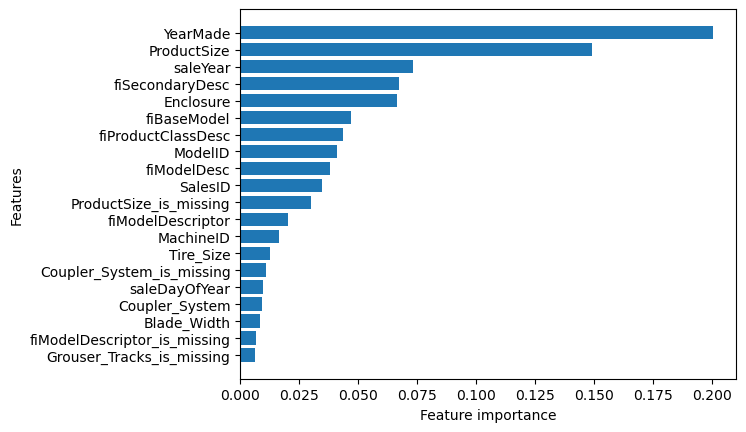

In [72]:
plot_features(X_train.columns,ideal_model.feature_importances_)

### Experimentation points

**Question to finish:** Why might knowing the feature importance of a trained machine learning model be helpful ?

**Alternate approach:** What other machine learning models could we try on our dataset ?
* Machine learning map : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
* CatBoost.ai or XGBoost.ai might also be helpful.